In [ ]:
# This reads in FITS files of the FFT amp and FFT arg, and puts masks over them and 
# writes out figures for publication

# Created 2019 July 24 by E.S.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [ ]:
'''
# some filename stems

fft_amp_masked_region_4_psf_trial1_00002384_000012
fft_amp_masked_region_4_psf_trial2_00002426_000015
fft_amp_masked_region_4_psf_trial3_00002476_000008
fft_amp_masked_region_4_psf_trial4_00002476_000006

fft_arg_masked_region_4_psf_trial1_00002384_000012
fft_arg_masked_region_4_psf_trial2_00002426_000015
fft_arg_masked_region_4_psf_trial3_00002476_000008
fft_arg_masked_region_4_psf_trial4_00002476_000006

fft_amp_masked_region_4_psf_trial1_00007259_000005
fft_amp_masked_region_4_psf_trial2_00007349_000013
fft_amp_masked_region_4_psf_trial3_00007402_000007
fft_amp_masked_region_4_psf_trial4_00007420_000007

fft_arg_masked_region_4_psf_trial1_00007259_000011
fft_arg_masked_region_4_psf_trial2_00007349_000010
fft_arg_masked_region_4_psf_trial3_00007402_000007
fft_arg_masked_region_4_psf_trial4_00007420_000012
'''

In [28]:
amp_image_filename = "fft_amp_masked_region_4_psf_trial4_00007420_000007.fits"
data_amp, hdr = fits.getdata(amp_image_filename, 0, header=True)
arg_image_filename = "fft_arg_masked_region_4_psf_trial4_00007420_000007.fits"
data_arg, hdr = fits.getdata(arg_image_filename, 0, header=True)

In [29]:
data2_amp = np.copy(data_amp)
data2_amp[np.where(data_amp < 4e9)] = np.nan
data2_arg = np.copy(data_arg)
data2_arg[np.where(data_amp < 4e9)] = np.nan

/Users/nyumbani/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/nyumbani/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


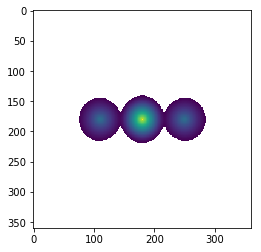

In [30]:
plt.imshow(data2_amp)
plt.show()

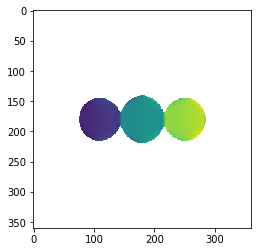

In [31]:
plt.imshow(data2_arg)
plt.show()

/Users/nyumbani/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


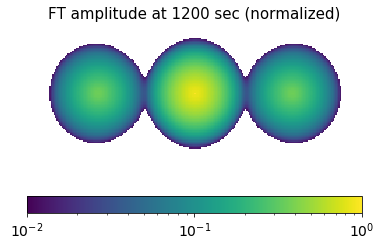

In [32]:
plt.clf()
plt.imshow(np.divide(data2_amp[130:-130,60:-60],np.nanmax(data2_amp)), 
           origin="lower", norm=LogNorm(vmin=0.01, vmax=1))
plt.title("FT amplitude at 1200 sec (normalized)", fontsize=15)
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=14)
plt.axis('off')
#plt.show()
plt.savefig("fft_amp_1200sec.png")

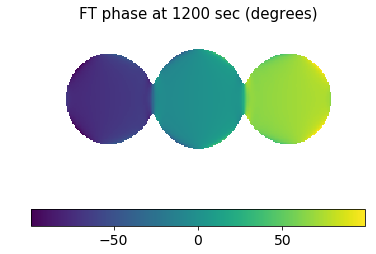

In [33]:
plt.clf()
plt.imshow(np.multiply(data2_arg[120:-120,50:-50],180/np.pi), origin="lower")
plt.title("FT phase at 1200 sec (degrees)", fontsize=15)
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=14)
plt.axis('off')
#plt.show()
plt.savefig("fft_arg_1200sec.png")